# 🛒 Superstore Data Analysis Project

## 🎯 Project Objective

A multinational retail company is embarking on a campaign called Operation Increase Sales and Profit' (OISP) which focuses on increasing the sales of the company and maximising profit. As the company’s in-house data analyst team we are tasked with analyzing a four year daily sales records data to find meaningful insights to help the management team take any actionable decisions with regards to the campaign.

- What are the top 5 sales generating regions.
- What are the top 5 profit generating regions.
- What categories sold the most units in this top 5 regions.
- What catgories made the most sales in this top 5 regions.
- What catgories made the most profit in this top 5 regions.
- What is the relationship between sales, profit, quantity and discount of categories in the top 5 regions.
- What sub-categories sold the most units in the top 5 regions.
- What sub-categories made the most sales in the top 5 regions.
- What sub-categories made the most profit in the top 5 regions.

#### Importing the required libraries for data analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

## 🔍 Data Assessment

#### Loading data into the kernel

In [ ]:
data = pd.read_csv("superstore.csv", encoding = "latin-1")

#### Making a copy of the data

In [ ]:
copy_superstore = data.copy()

#### Checking for the shape of the data

In [ ]:
data.shape

(51290, 24)

#### Checking the size of the data

In [ ]:
data.size

1230960

#### Checking for available columns in the data

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#### Checking for null values in the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### Checking for duplicates in the data

In [ ]:
data[data.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


#### Suming duplicates in the data

In [ ]:
data.duplicated().sum()

0

#### Changing data types of columns to aid in data analysis

In [ ]:
categorical_cols = ["Ship Mode", "Country", "Market", "Region", "Category", "Segment", "Sub-Category", "Order Priority"]
data[categorical_cols] = data[categorical_cols].astype("category")
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])

#### Checking the data types in the data

In [ ]:
data.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode               category
Customer ID               object
Customer Name             object
Segment                 category
City                      object
State                     object
Country                 category
Postal Code              float64
Market                  category
Region                  category
Product ID                object
Category                category
Sub-Category            category
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority          category
dtype: object

#### Checking for summary statistics of the data

In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


#### Checking for first 5 rows of the data

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


#### Checking for the last five rows of the data

In [ ]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


#### Inserting the data into a dataframe

In [ ]:
df = pd.DataFrame(data)

#### Summary statistics of the quantity column

In [ ]:
df["Quantity"].describe()

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

#### Summary statistics of the sales column

In [ ]:
df["Sales"].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

#### Summary statistics of the profit column

In [ ]:
df["Profit"].describe()

count    51290.000000
mean        28.610982
std        174.340972
min      -6599.978000
25%          0.000000
50%          9.240000
75%         36.810000
max       8399.976000
Name: Profit, dtype: float64

#### Summary statistics of the discount column

In [ ]:
df["Discount"].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: Discount, dtype: float64

#### Summary statistics of non-numerical columns in the data

In [ ]:
df.describe(include = "category")

,Ship Mode,Segment,Country,Market,Region,Category,Sub-Category,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290
unique,4,3,147,7,13,3,17,4
top,Standard Class,Consumer,United States,APAC,Central,Office Supplies,Binders,Medium
freq,30775,26518,9994,11002,11117,31273,6152,29433


#### Adding new columns to the data

In [ ]:
df_month = df["Order Date"].dt.month_name()   #adding a month column
df.insert(loc = 3, column = 'Month', value = df_month)

In [ ]:
df['Month'] = df['Month'].astype('str')  #changing OrderYear column from integer to string
df['Month']

0         January
1         January
2         January
3         January
4         January
           ...   
51285    December
51286    December
51287    December
51288    December
51289    December
Name: Month, Length: 51290, dtype: object

In [ ]:
df_year = pd.DatetimeIndex(df['Order Date']).year  #adding a new column called Year
df.insert(loc = 4, column = 'Year', value = df_year)

In [ ]:
df['Year'] = df['Year'].astype('str')  #changing OrderYear column from integer to string
df['Year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
51285    2014
51286    2014
51287    2014
51288    2014
51289    2014
Name: Year, Length: 51290, dtype: object

#### Checking for added columns of the data

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Month,Year,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,January,2011,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,January,2011,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,January,2011,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,January,2011,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,January,2011,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### Distribution of numerical columns of the data

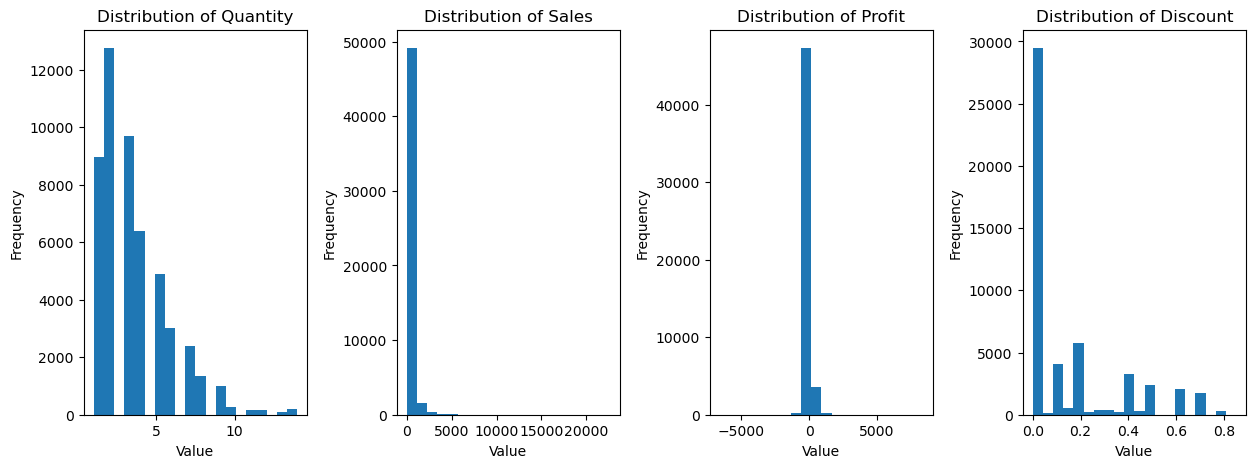

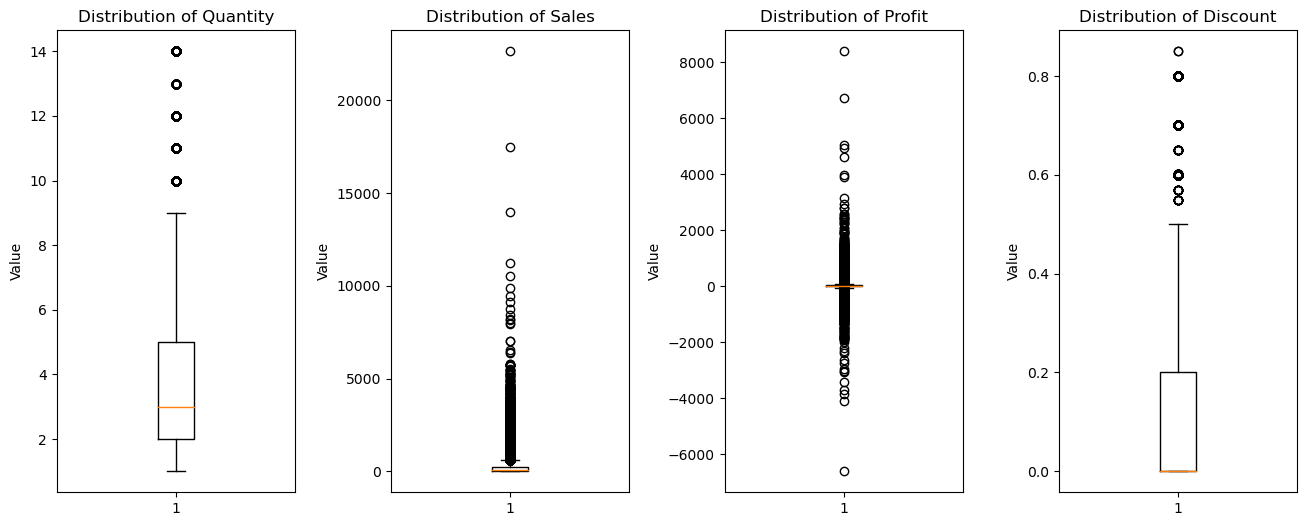

In [ ]:
def plot_four_histograms(data):
    fig, axs = plt.subplots(1, 4, figsize=(15,5))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'Discount']):
        axs[i].hist(data[col], bins=20)
        axs[i].set_title(f'Distribution of {col.capitalize()}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.show()

plot_four_histograms(data)


def plot_four_boxplots(data):
    fig, axs = plt.subplots(1, 4, figsize=(16, 6))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['Quantity', 'Sales', 'Profit', 'Discount']):
        axs[i].boxplot(data[col])
        axs[i].set_title(f'Distribution of {col.capitalize()}')
        axs[i].set_ylabel('Value')

    plt.show()

plot_four_boxplots(data)


The following observations were made from the numerical distribution of the Quantity, Sales, Profit, Discount columns in the immediate line of code above

- The Distribution of Quantity, Sales and Profit are extremely right skewed.
- The Distribution of Profit is Normally distributed with very low value of standard deviation.
- The Distribution of Quantity is right skewed with a lot of outliers on the right side
- The Distribution of Discount is unimodal in nature
- The Outliers are high sales and heavy losses which is important info so they can not be taken out.


## 🔍 Exploratory Data Analysis

### Finding the quantity, sales and profit of the various categories

In [ ]:
def calculate_category_segment_ship_mode_totals(x,y):
    category_segment_ship_mode_totals = data.groupby(x)[y].sum().to_frame()
    return category_segment_ship_mode_totals

def plot_category_segment_ship_mode_totals(x,y,z,a):
    plt.figure(figsize = (6,3))
    sns.barplot(x=x.index, y=y, data=x.reset_index(), order=x.sort_values(y, ascending=False).index, palette=z)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=0)
    plt.title(a)
    plt.show()


### Finding the quantity, sales and profit of the various categories

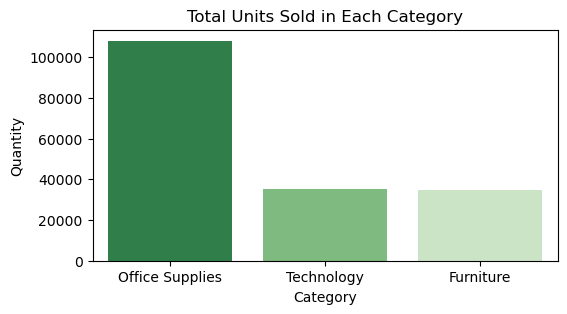

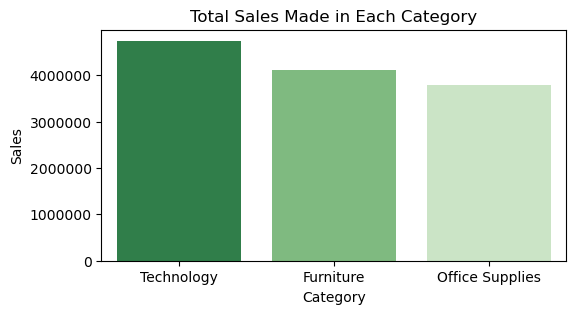

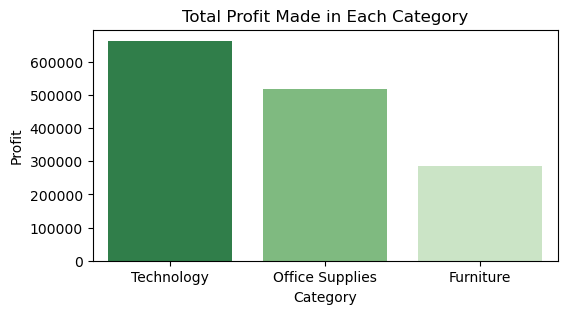

In [ ]:
total_quantity = calculate_category_segment_ship_mode_totals('Category', 'Quantity')
plot_category_segment_ship_mode_totals(total_quantity, 'Quantity', 'Greens_r', 'Total Units Sold in Each Category')

total_sales = calculate_category_segment_ship_mode_totals('Category', 'Sales')
plot_category_segment_ship_mode_totals(total_sales, 'Sales', 'Greens_r', 'Total Sales Made in Each Category')

total_profit = calculate_category_segment_ship_mode_totals('Category', 'Profit')
plot_category_segment_ship_mode_totals(total_profit, 'Profit', 'Greens_r', 'Total Profit Made in Each Category')

The following observations were made from the count of the Quantity, Sales, Profits columns based on Category in the lines of code above.

- In the Total Units Sold in Category chart, office supplies had the most quantity sold, followed by technology and furniture.
- In the Total Sales Made in Category chart, technology made the most sales, followed by furniture and  office supplies.
- In the Total Profit Made in Category chart, technology made the most profit, followed by office supplies and furniture.

### Finding the quantity, sales and profit of the various segments

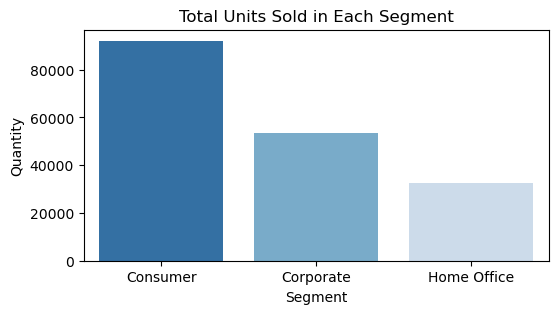

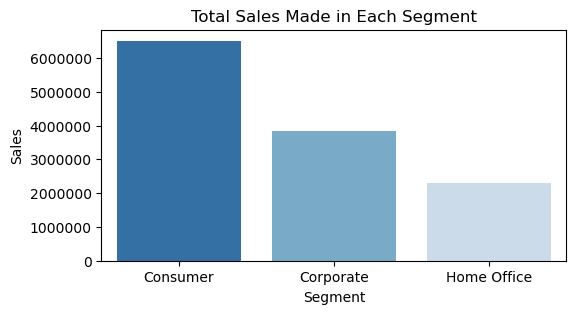

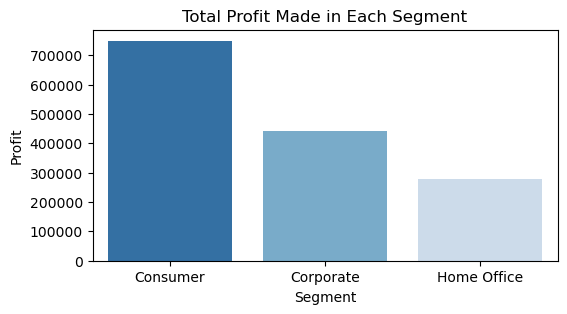

In [ ]:
total_quantity = calculate_category_segment_ship_mode_totals('Segment', 'Quantity')
plot_category_segment_ship_mode_totals(total_quantity, 'Quantity', 'Blues_r', 'Total Units Sold in Each Segment')

total_sales = calculate_category_segment_ship_mode_totals('Segment', 'Sales')
plot_category_segment_ship_mode_totals(total_sales, 'Sales', 'Blues_r', 'Total Sales Made in Each Segment')

total_profit = calculate_category_segment_ship_mode_totals('Segment', 'Profit')
plot_category_segment_ship_mode_totals(total_profit, 'Profit', 'Blues_r', 'Total Profit Made in Each Segment')

The following observations were made from the count of the Quantity, Sales, Profits columns based on Segment in the lines of code above.

- In the Total Units Sold in Segment chart, the consumer segment had the most units sold, followed by corporate and home office.
- In the Total Sales Made in Segment chart, the consumer segment made the most sales, followed by corporate and home office.
- In the Total Profit Made in Segment chart, the consumer segment made the most profit, followed by corporate and home office.

### Finding the quantity, sales and profit of the various shipping modes

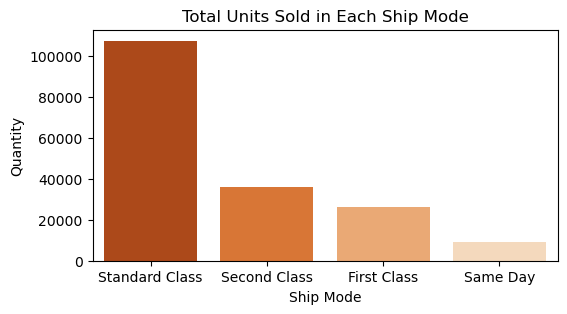

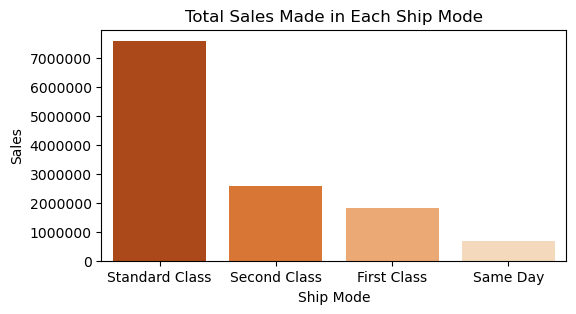

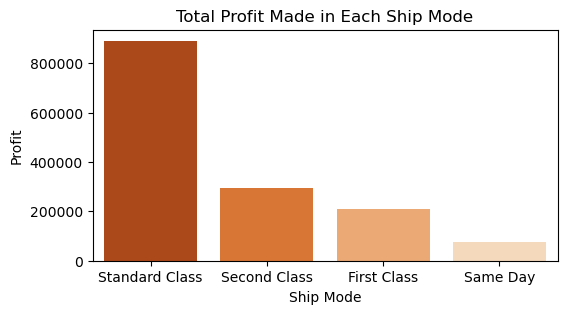

In [ ]:
total_quantity = calculate_category_segment_ship_mode_totals('Ship Mode', 'Quantity')
plot_category_segment_ship_mode_totals(total_quantity, 'Quantity', 'Oranges_r', 'Total Units Sold in Each Ship Mode')

total_sales = calculate_category_segment_ship_mode_totals('Ship Mode', 'Sales')
plot_category_segment_ship_mode_totals(total_sales, 'Sales', 'Oranges_r', 'Total Sales Made in Each Ship Mode')

total_profit = calculate_category_segment_ship_mode_totals('Ship Mode', 'Profit')
plot_category_segment_ship_mode_totals(total_profit, 'Profit', 'Oranges_r', 'Total Profit Made in Each Ship Mode')

The following observations were made from the count of the Quantity, Sales, Profit, Discount columns based on Ship Mode in the lines of code above.

- In the Total Units by Ship Mode chart, the standard class was patronized more compared to the second and first class and same day patronized the least.
- In the Total Sales Made by Ship Mode chart, the standard class made significant sales compared to the second and first class and same day made the least.
- In the Total Profit Made by Ship Mode chart, the standard class made significant profit compared to the second and first class and same day made the least.

### Finding the sales and profit trends over the period

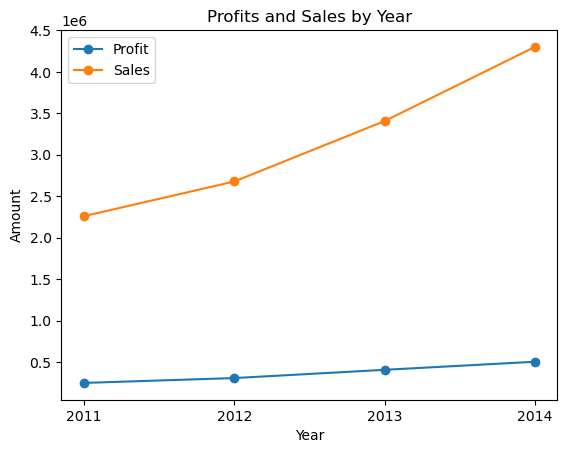

In [ ]:
def plot_profits_and_sales_by_year(df):
    profits_by_year = df.groupby('Year')['Profit'].sum()
    sales_by_year = df.groupby('Year')['Sales'].sum()
    years = df['Year'].unique()
    plt.plot(years, profits_by_year, marker='o', label='Profit')
    plt.plot(years, sales_by_year, marker='o', label='Sales')
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Profits and Sales by Year')
    plt.legend()
    plt.show()

plot_profits_and_sales_by_year(df)

After studying, the trends of sales and profits over the period, the observation made was that, sales grew rapidly over the four-year period and profits grew steadily over the period.

### Correlation between quantity, sales and profit

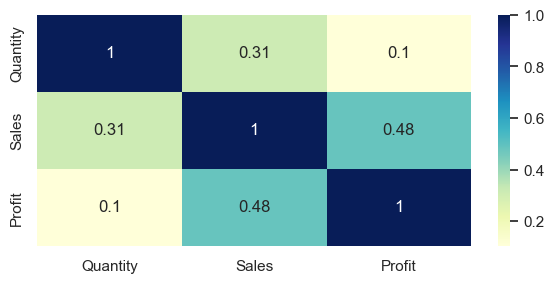

In [ ]:
heatmap = df[['Quantity', 'Sales', 'Profit']]
plt.figure(figsize=(7,3))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'YlGnBu')

### Finding the quantity, sales and profit of the top performing regions

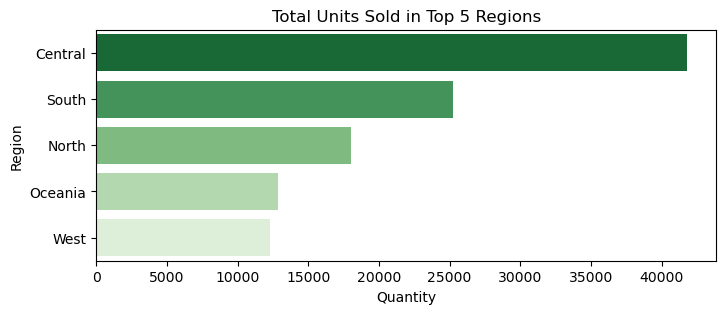

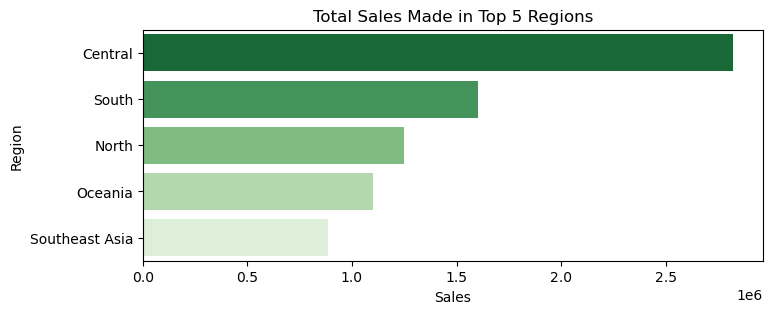

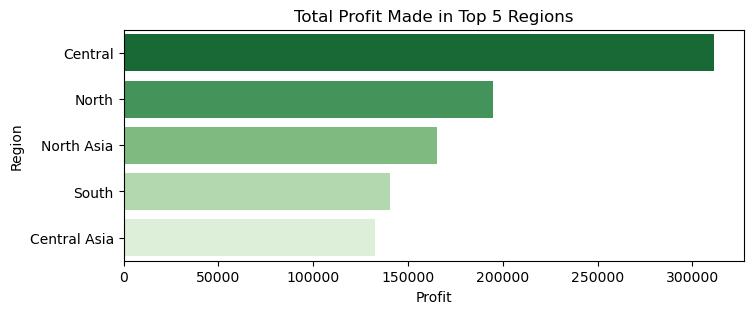

In [ ]:
def plot_ship_mode_totals(column_name, group_by_column, palette, title):
    top_5_group_totals = df.groupby(group_by_column)[column_name].sum().nlargest(5).reset_index()
    plt.figure(figsize = (8,3))
    sns.barplot(x=column_name, y=group_by_column, data=top_5_group_totals, order=top_5_group_totals.sort_values(column_name, ascending=False)[group_by_column], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    plt.show()

plot_ship_mode_totals("Quantity", "Region", "Greens_r", "Total Units Sold in Top 5 Regions")
plot_ship_mode_totals("Sales", "Region", "Greens_r", "Total Sales Made in Top 5 Regions")
plot_ship_mode_totals("Profit", "Region", "Greens_r", "Total Profit Made in Top 5 Regions")


The following observations were made from the count of the Quantity, Sales, Profit, Discount columns based on Ship Mode in the lines of code above.

- In the Total Units Sold in Top 5 Regions chart, the Central, South, North, Oceania and West regions are the best performing regions in terms of units sold. The Central region selling out the most units, South and North regions following the Central region and the Oceania and West regions having low units sold in the top 5 best performing regions.
- In the Total Sales in Top 5 Regions chart, the Central, South, North, Oceania and Southeast Asia regions are the best performing regions in terms of sales made. The Central region made significant sales, South and North regions following the Central region and the Oceania and Southeast Asia regions having made the least sales made in the top 5 best performing regions.
- In the Total Profit Made in Top 5 Regions chart, the Central, North, North Asia, South and Central Asia regions are the best perfoming regions in terms of profit made. The Central region made significant profit, North and North Asia regions and South and Central Asia having made the least profit made in the top 5 best performing regions.

### Correlation between quantity, sales and profit of  5 best performing regions

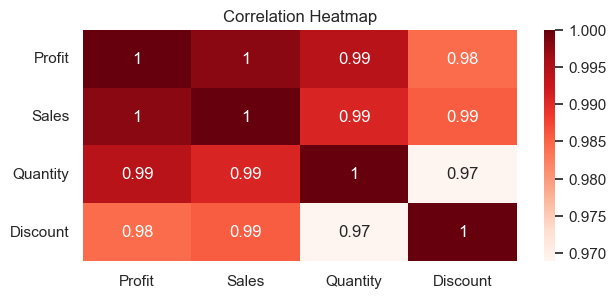

In [ ]:
def calculate_region_totals(column_name, group_by_column):
    top_5_group_totals = df.groupby(group_by_column)[column_name].sum().nlargest(5).reset_index()
    return top_5_group_totals

def plot_correlation_heatmap(data):
    corr = data.corr()

    plt.figure(figsize=(7, 3))
    sns.set_theme(style="white")
    heatmap = sns.heatmap(corr, annot=True, cmap='Reds')
    plt.title('Correlation Heatmap')
    plt.show()

region_totals_profit = calculate_region_totals("Profit", "Region")
region_totals_sales = calculate_region_totals("Sales", "Region")
region_totals_quantity = calculate_region_totals("Quantity", "Region")
region_totals_discount = calculate_region_totals("Discount", "Region")

heatmap_data = pd.concat([region_totals_profit, region_totals_sales, region_totals_quantity, region_totals_discount], axis=1)
plot_correlation_heatmap(heatmap_data)


The following observations were made from the Correlation between quantity, sales and profit of 5 best performing regions in the lines of code above.

- The correlation heatmap shows are strong positive correlation between columns. This means that there is a strong linear relationship between the two columns, and that as one column increases, the other column tends to increase as well.

### Finding the quantity, sales and profits of the top 5 regions based on categories

In [ ]:
def calculate_region_specific_totals(region, x, y):
    region_df = df[df["Region"] == region]
    category_totals = region_df.groupby(x)[y].sum().to_frame()
    return category_totals

def plot_totals_bar(category_totals, group_by_column, column_name, title, palette, ax):
    top_5_group_totals = category_totals.nlargest(5, column_name).reset_index()
    sns.barplot(x=group_by_column, y=column_name, data=top_5_group_totals, order=top_5_group_totals.sort_values(column_name, ascending=False)[group_by_column], palette=palette, ax=ax)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(title)

### Finding the quantity, sales and profits of the Central region based on categories

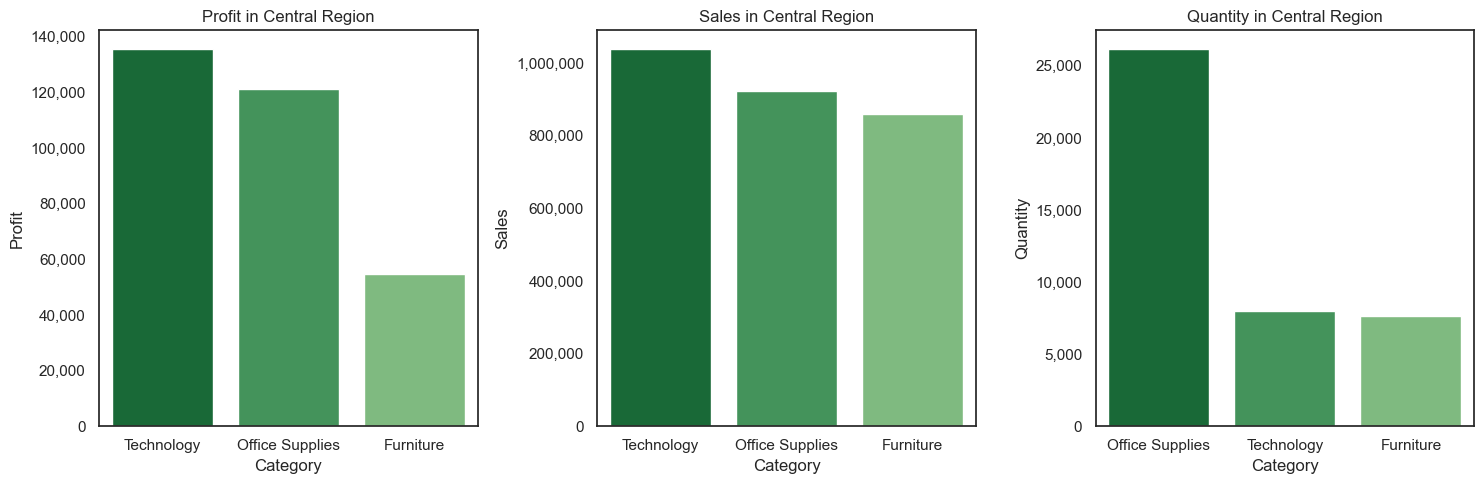

In [ ]:
region = "Central"
palette = sns.color_palette("Greens_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the Central Region based on categories:

- Most units sold were in the Office Supplies category, followed by the technology category and the Furniture category with the least units sold.
- Most sales made was in the Technology category, followed by Office Supplies category and the Furniture category.
- Most profits made were in the Technology category, followed by Office Supplies category and Furniture category.

### Finding the quantity, sales and profits of the North region based on categories

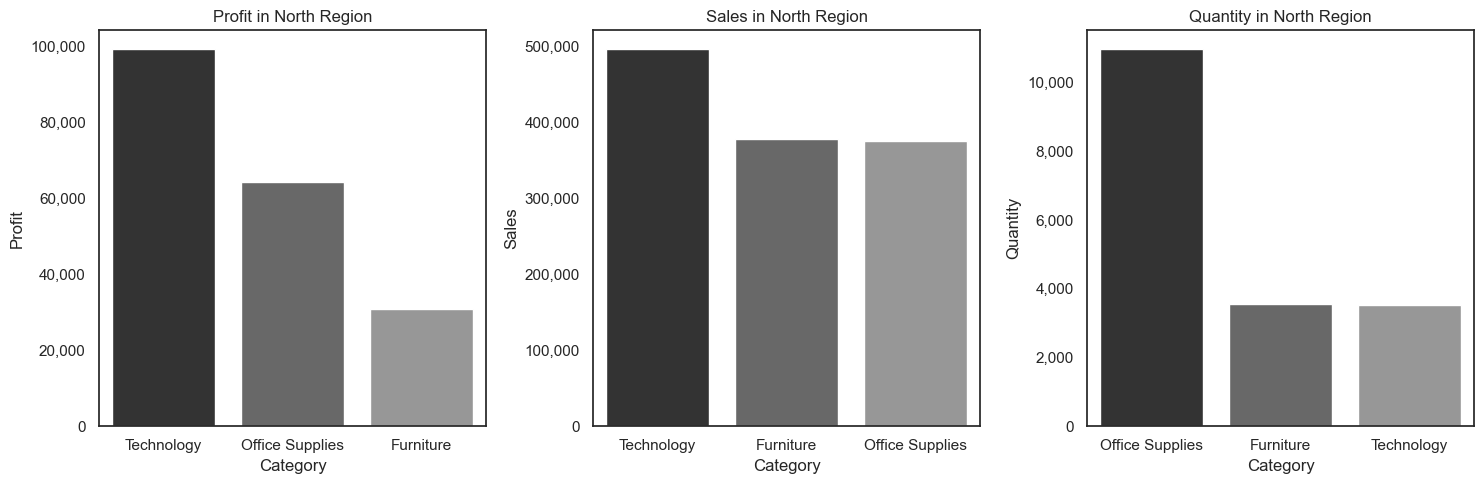

In [ ]:
region = "North"
palette = sns.color_palette("Greys_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the North Region based on categories:

- The Office Supplies category sold the most units and the Furniture category slightly selling a little more units than the Technology category.
- The Technology category mades the most sales and the Furniture category slightly making a little more sales than the Office Supplies category.
- The Technology category made the most profits than Office Supplies and the Furniture category made the least profits.

### Finding the quantity, sales and profit of the South region based on categories

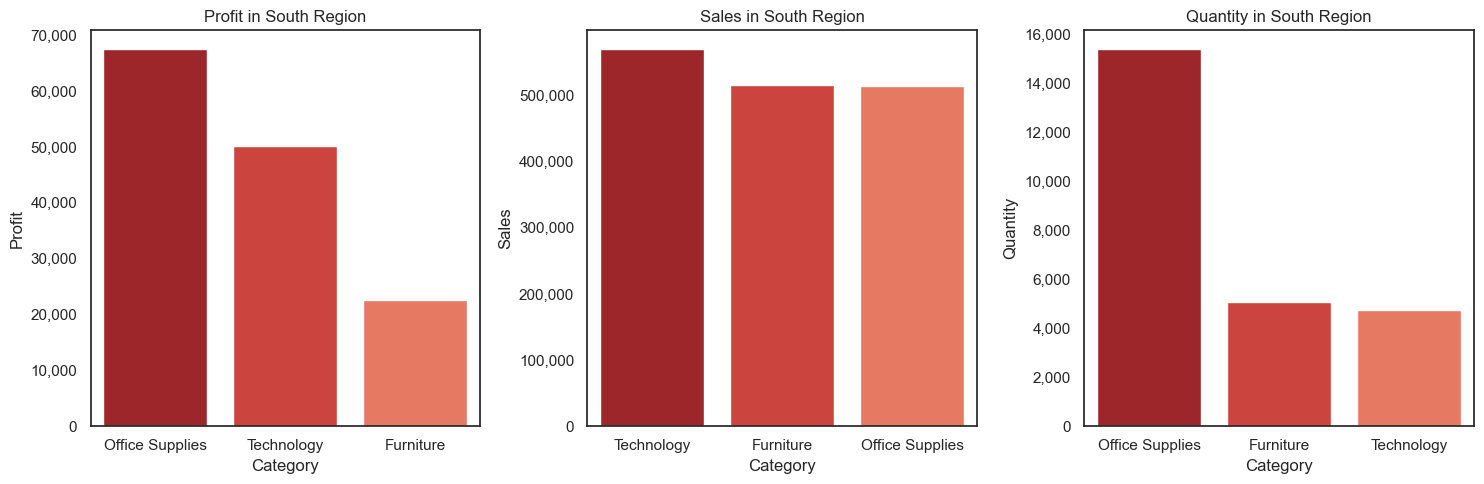

In [ ]:
region = "South"
palette = sns.color_palette("Reds_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the South Region based on categories:

- The Office Supplies category sold the most units and the Furniture category slightly selling a little more units than the Technology category.
- The Technology category mades the most sales and the Furniture category slightly making a little more sales than the Office Supplies category.
- The Office Supplies category made the most profits than Technology and the Furniture category made the least profits.

### Finding the quantity, sales and profit of the Oceania region based on categories

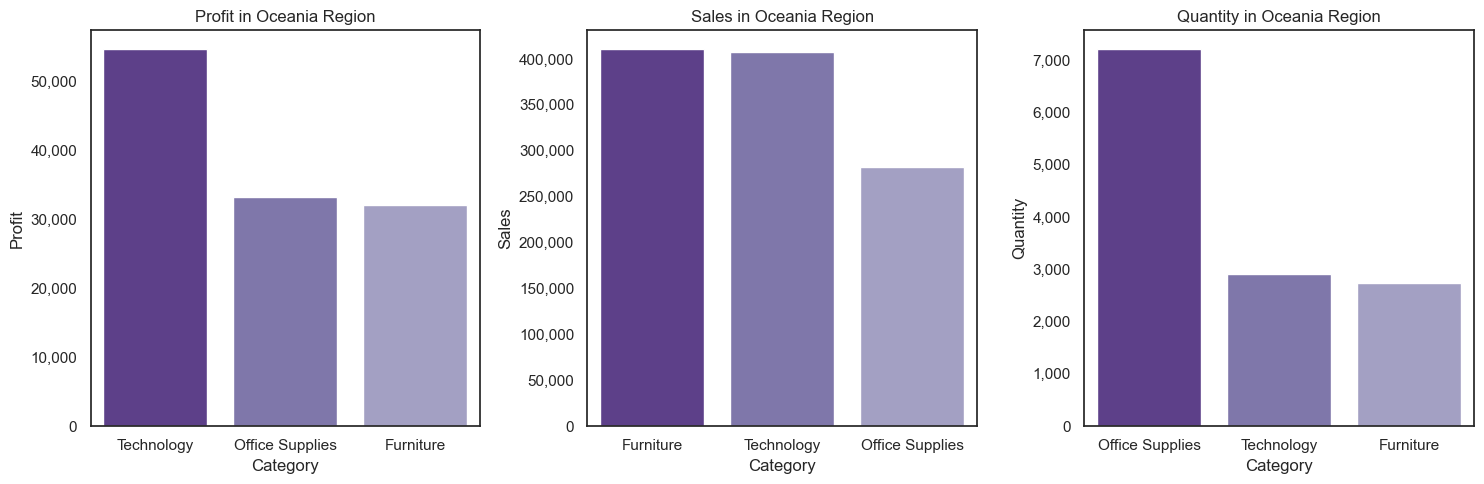

In [ ]:
region = "Oceania"
palette = sns.color_palette("Purples_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the Oceania Region based on categories:

- The Office Supplies sold the most units and the Technology category sold relatively more units than the Furniture category.
- The Furniture category made slightly more sales than the Technology category and the Office Supplies category made the least sales among the categories.
- The Technology category made a significant profit more than the Office Supplies and the Furniture categories.

##### Finding the quantity, sales and profit of the West region based on categories

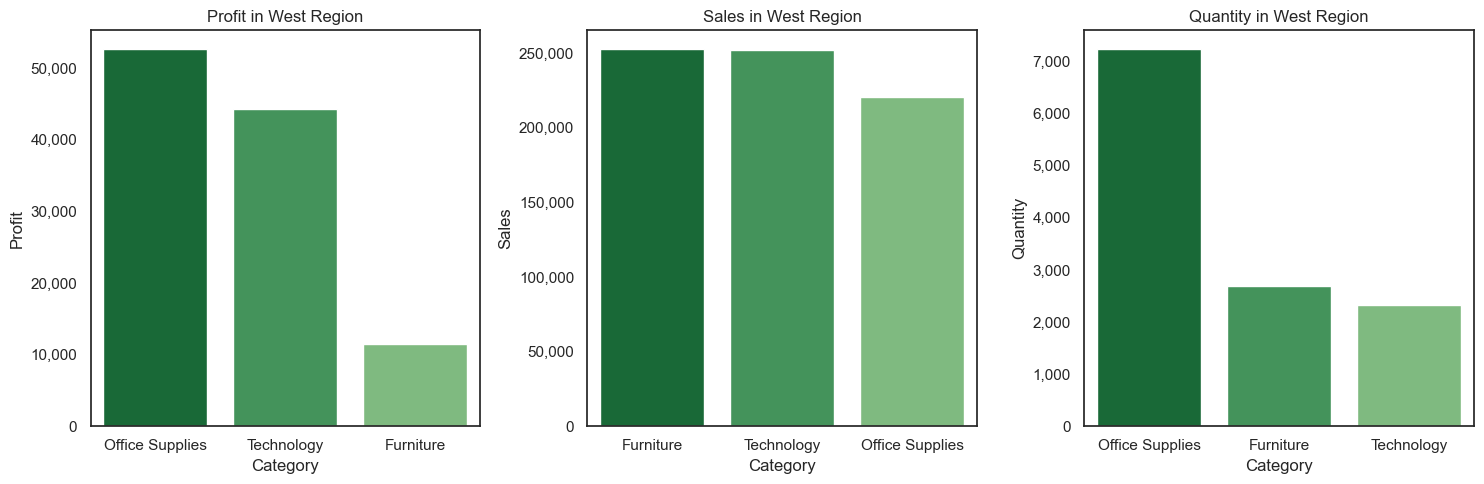

In [ ]:
region = "West"
palette = sns.color_palette("Greens_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the West Region based on categories:

- The Office Supplies sold the most units and the Furniture category sold more units than the Technology category.
- The Furniture category made slightly more sales than the Technology category and the Office Supplies category made significant sales but is still the least among the categories.
- The Office Supplies category made profits more than the Technology category and the Furniture category made the least.

### Finding the quantity, sales and profit of the North Asia region based on categories

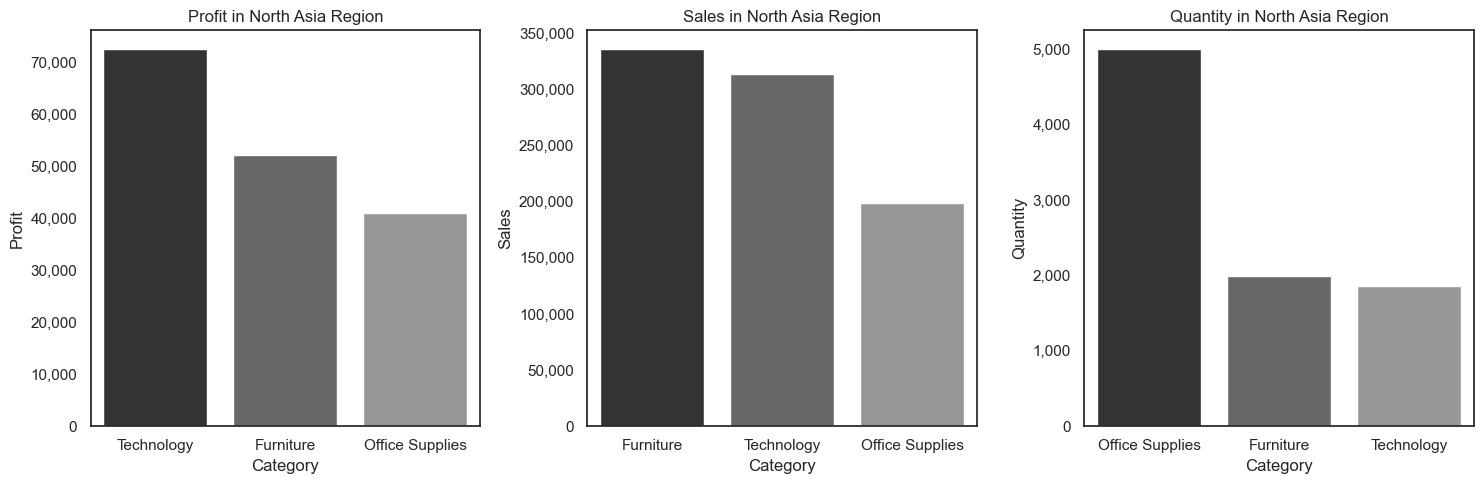

In [ ]:
region = "North Asia"
palette = sns.color_palette("Greys_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the North Asia Region based on categories:

- The Office Supplies sold the most units and the Furniture category sold more units than the Technology category.
- The Furniture category made slightly more sales than the Technology category and the Office Supplies category made significant sales but is still the least among the categories.
- The Technology category made profits more than the Furniture category and the Office Supplies category made relatively the least.

### Finding the quantity, sales and profit of the Central Asia region based on categories

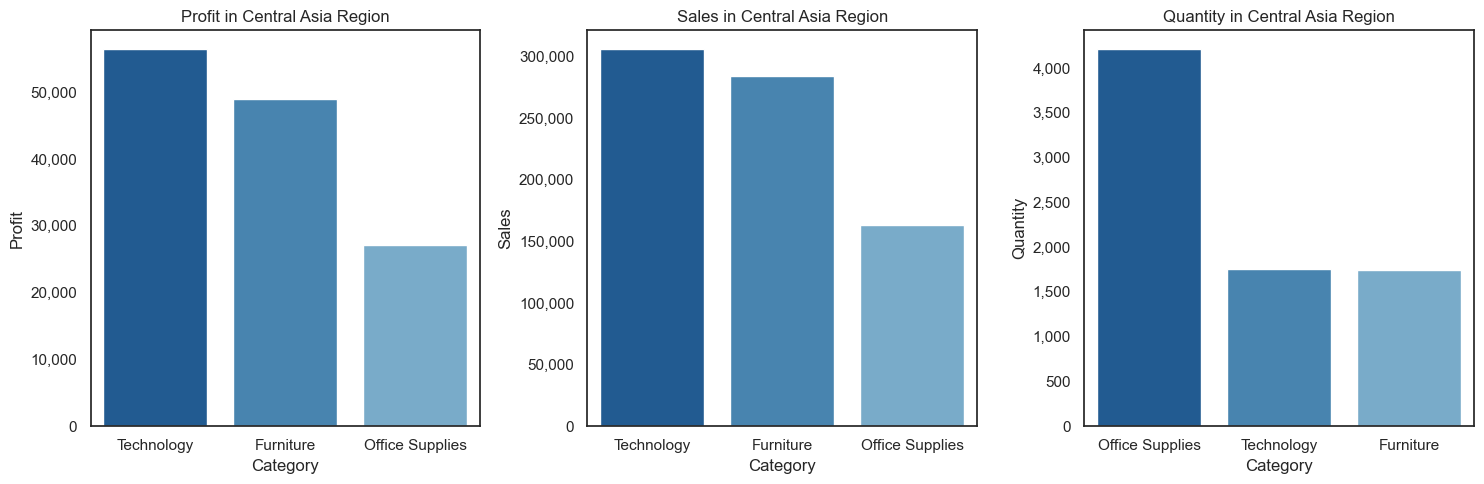

In [ ]:
region = "Central Asia"
palette = sns.color_palette("Blues_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the Central Asia Region based on categories:

- The Office Supplies sold the most units and the Technology category sold more units than the Furniture category.
- The Technology category made slightly more sales than the Furniture category and the Office Supplies category made significant sales but is still the least among the categories.
- The Office Supplies category made profits more than the Technology category and the Furniture category made the least.

### Finding the quantity, sales and profit of the Southeast Asia region based on categories

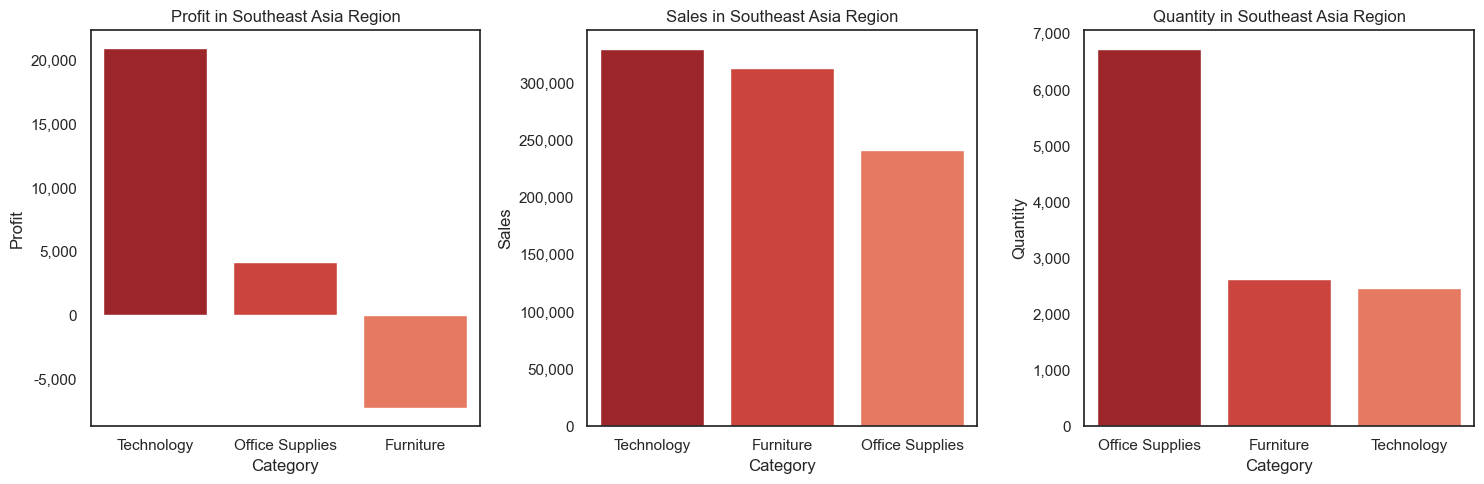

In [ ]:
region = "Southeast Asia"
palette = sns.color_palette("Reds_r", 5)

region_totals_profit = calculate_region_specific_totals(region, "Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Category", "Quantity")

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

plot_totals_bar(region_totals_profit, "Category", "Profit", f"Profit in {region} Region", palette, axs[0])
plot_totals_bar(region_totals_sales, "Category", "Sales", f"Sales in {region} Region", palette, axs[1])
plot_totals_bar(region_totals_quantity, "Category", "Quantity", f"Quantity in {region} Region", palette, axs[2])

plt.tight_layout()
plt.show()


The following observations were made after findings on quantity, sales and profits of the Southeast Asia Region based on categories:

- The Office Supplies sold the most units and the Furniture category sold more units than the Technology category.
- The Furniture category made slightly more sales than the Technology category and the Office Supplies category made significant sales but is still the least among the categories.
- The Office Supplies category made profits more than the Office Supplies category and the Furniture category made the least.

### Finding the quantity, sales and profits made in the top 5 regions based on sub categories

In [ ]:
def calculate_region_specific_totals(region, x, y):
    region_df = df[df["Region"] == region]
    sub_category_totals = region_df.groupby(x)[y].sum().reset_index()
    return sub_category_totals

def plot_totals_bar(sub_category_totals, group_by_column, column_name, title, palette):
    plt.figure(figsize = (10,5))
    sns.barplot(x=column_name, y=group_by_column, data=sub_category_totals, order=sub_category_totals.sort_values(column_name, ascending=False)[group_by_column], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    plt.show()


### Finding the quantity, sales and profits made in the Central region based on sub categories

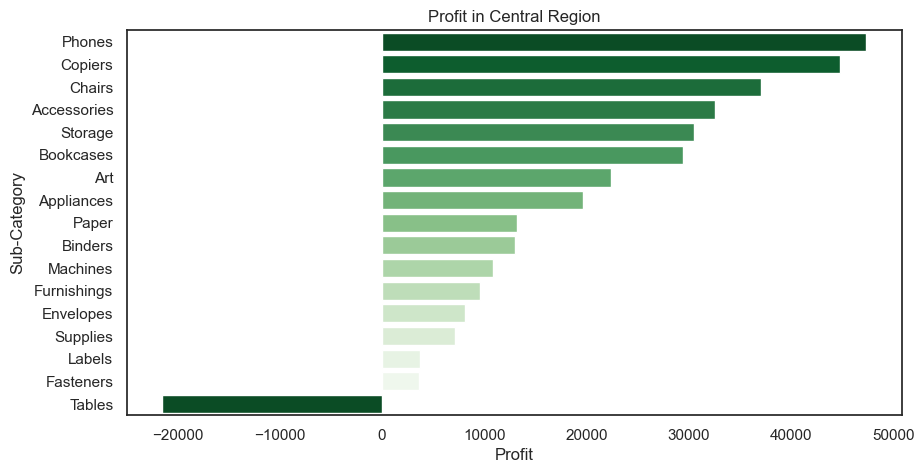

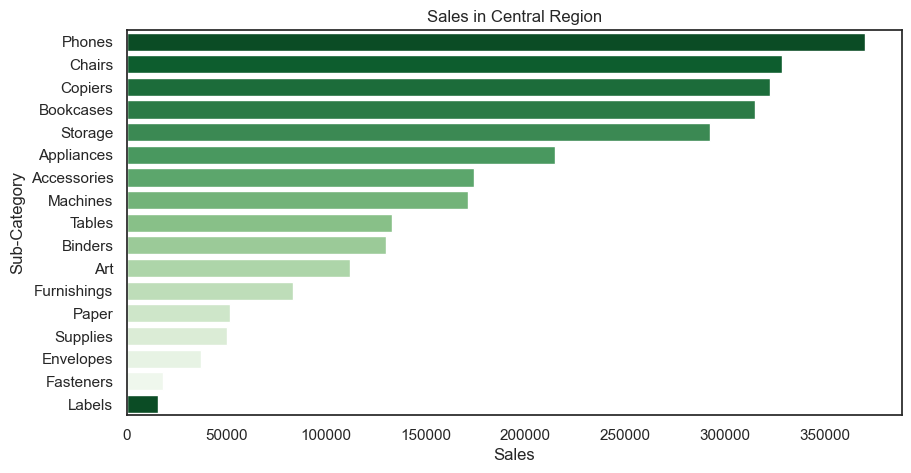

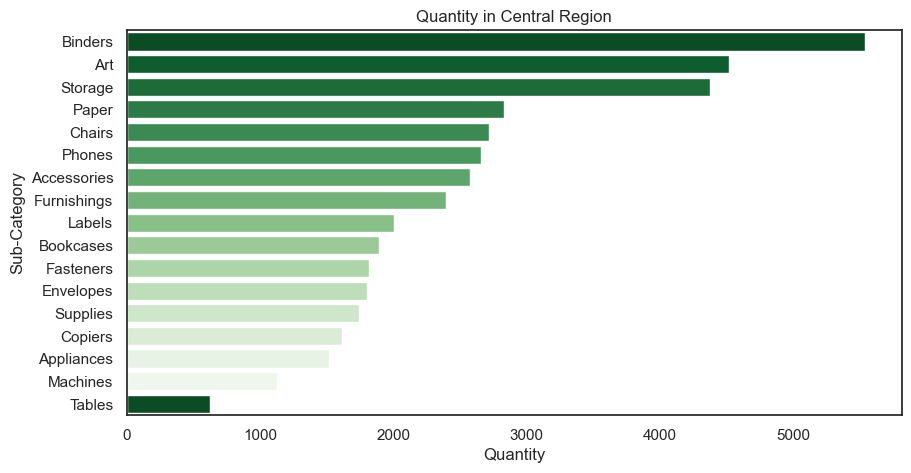

In [ ]:
region = "Central"
palette = sns.color_palette("Greens_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the Central Region based on sub category:

Phones were the most profitable product in the region, followed by Copiers. Conversely, Envelopes suffered a significant loss.

Phones had the highest sales in the region, with Labels having the lowest sales. On the other hand, Copiers had the second-highest number of products sold.

Binders topped the list of products with the highest number of units sold, followed by Storage, while Tables had the lowest number of units sold.

### Finding the quantity, sales and profits made in the North region based on sub categories

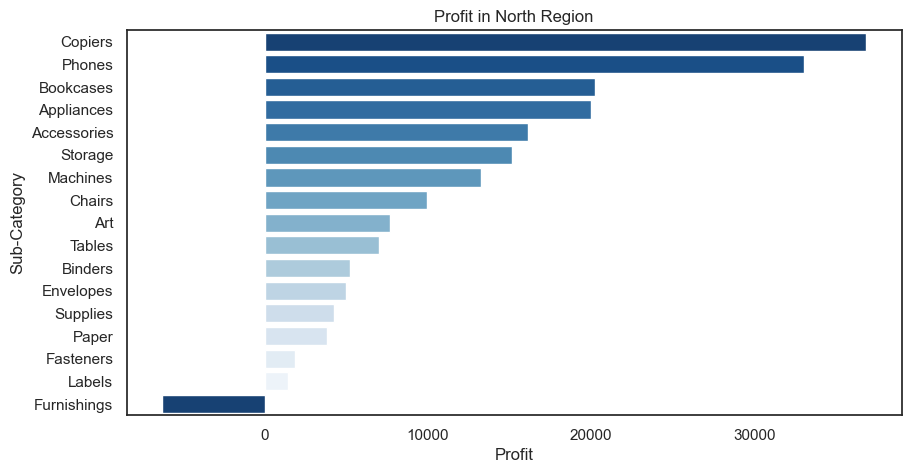

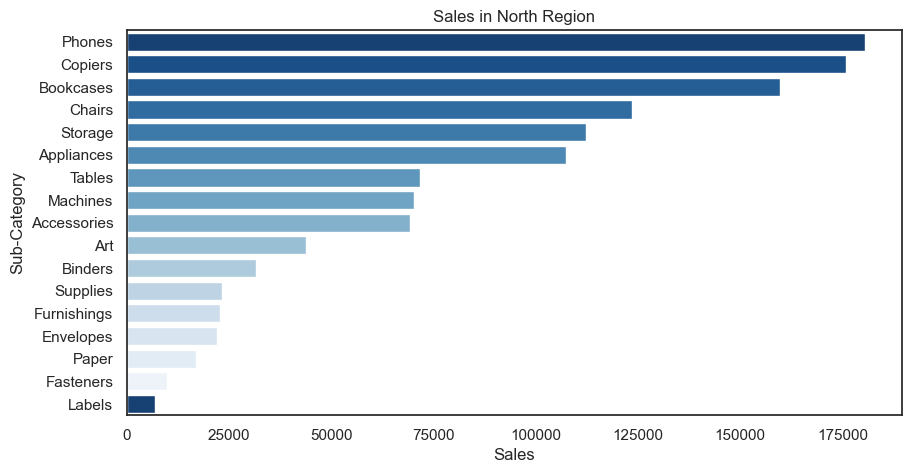

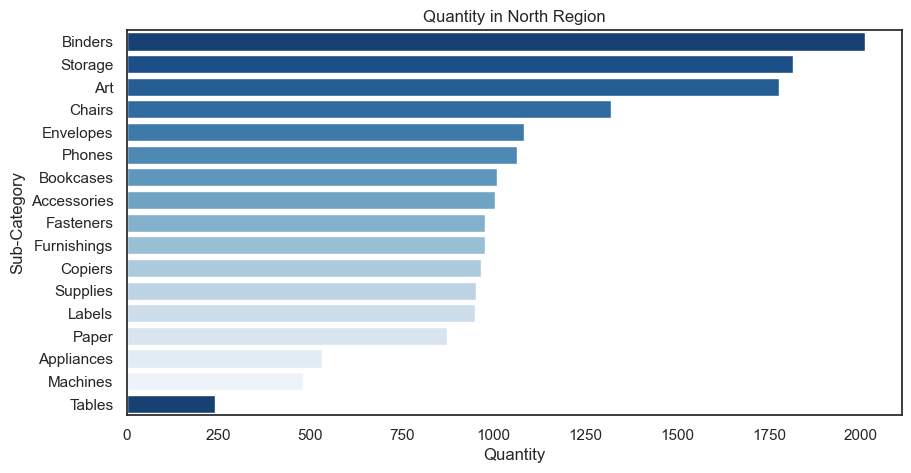

In [ ]:
region = "North"
palette = sns.color_palette("Blues_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the North  Region based on sub category:

Copiers were the most profitable product in the region, followed by Phones. However, Furnishings suffered a significant loss.

Phones had the highest sales in the region, with Labels having the lowest sales. On the other hand, Copiers had the second-highest number of products sold.

Binders topped the list of products with the highest number of units sold, followed by Storage, while Tables had the lowest number of units sold.

### Finding the quantity, sales and profits made in the South region based on sub categories

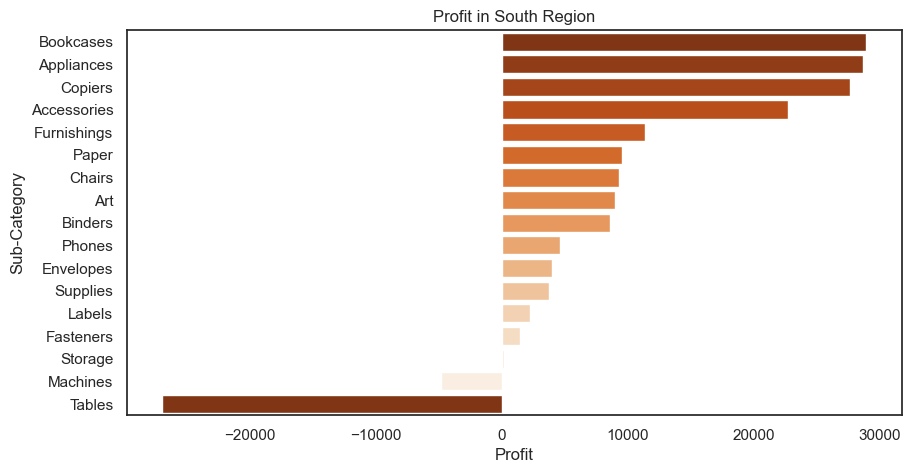

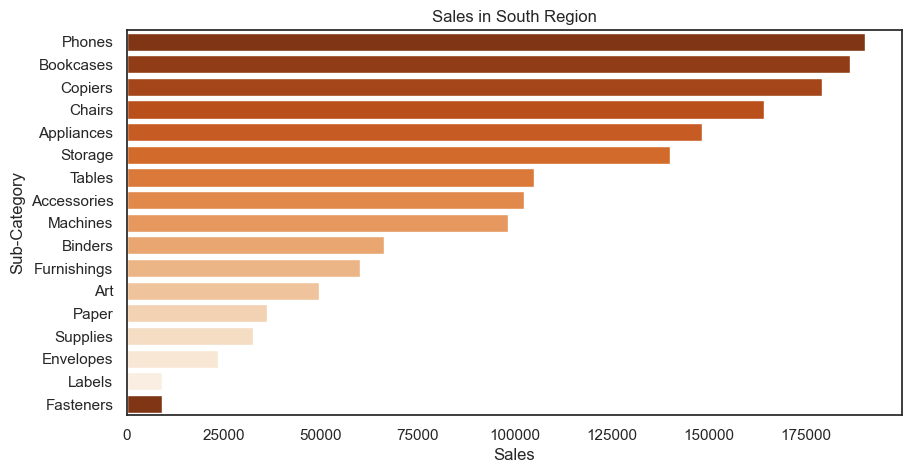

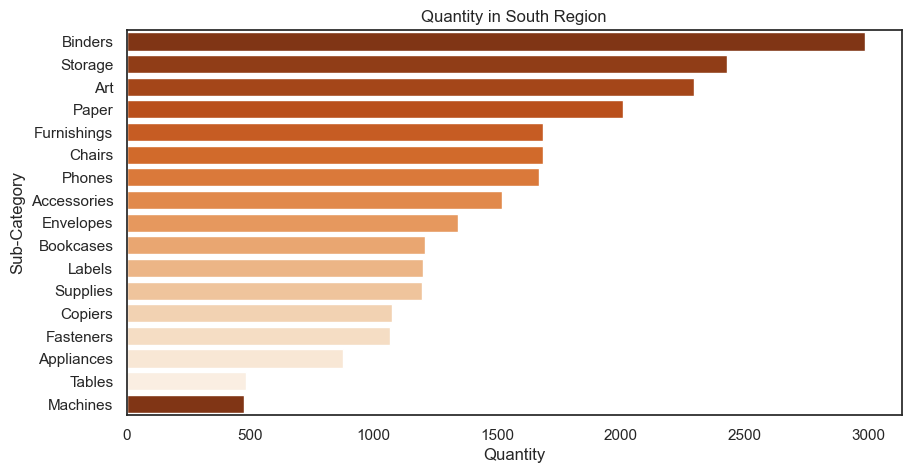

In [ ]:
region = "South"
palette = sns.color_palette("Oranges_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the South Region based on sub category:

Bookcases were the most profitable product in the region, slightly surpassing Appliances. Conversely, Tables suffered a significant loss.

Phones had the highest sales in the region, with Bookcases having the lowest sales. On the other hand, Fasteners had the second-highest number of products sold.

Binders topped the list of products with the highest number of units sold, followed by Storage, while Machines had the lowest number of units sold.

### Finding the quantity, sales and profits made in the Oceania region based on sub categories

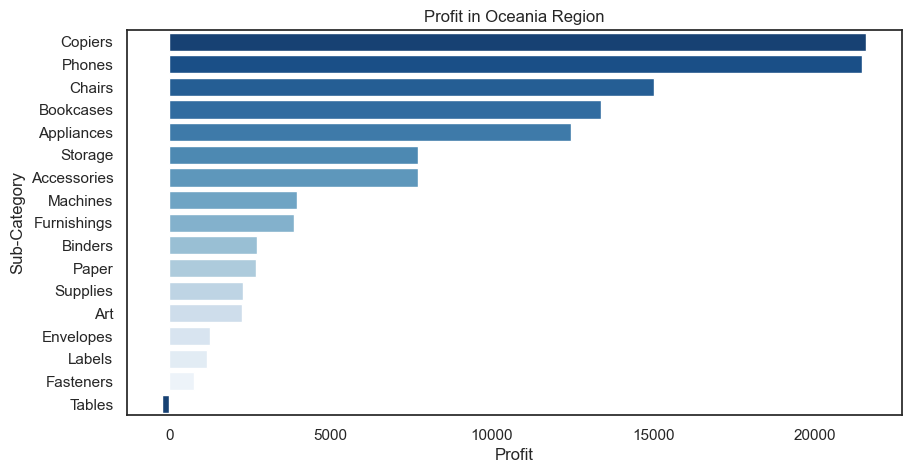

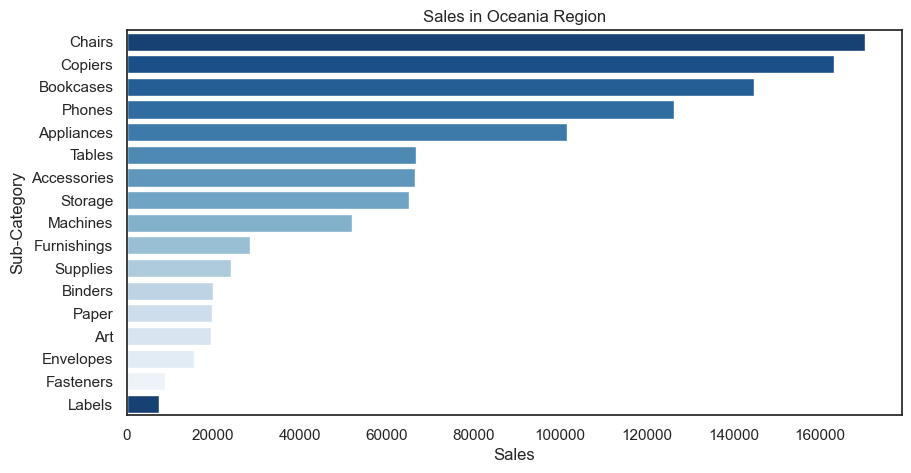

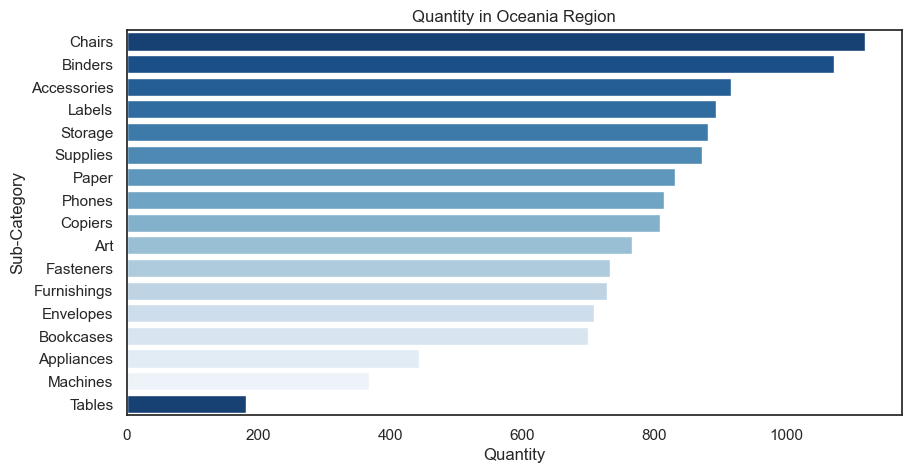

In [ ]:
region = "Oceania"
palette = sns.color_palette("Blues_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the Oceania  Region based on sub category:

Copiers were the most profitable product in the region, followed by Chairs. However, Tables suffered a significant loss.

Chairs had the highest sales in the region, with Copiers having the lowest sales. On the other hand, Labels had the second-highest number of products sold.

Chairs were the product with the highest number of units sold, followed by Binders, while Tables had the lowest number of units sold.

### Finding the quantity, sales and profits made in the West region based on sub categories

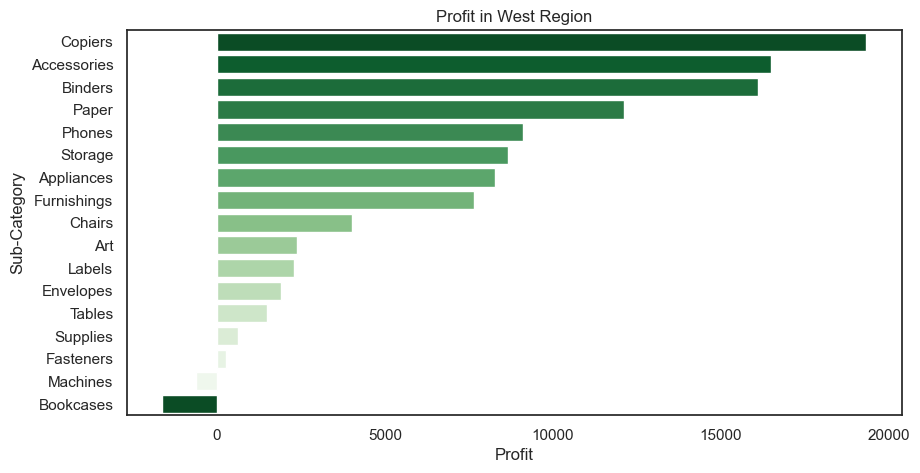

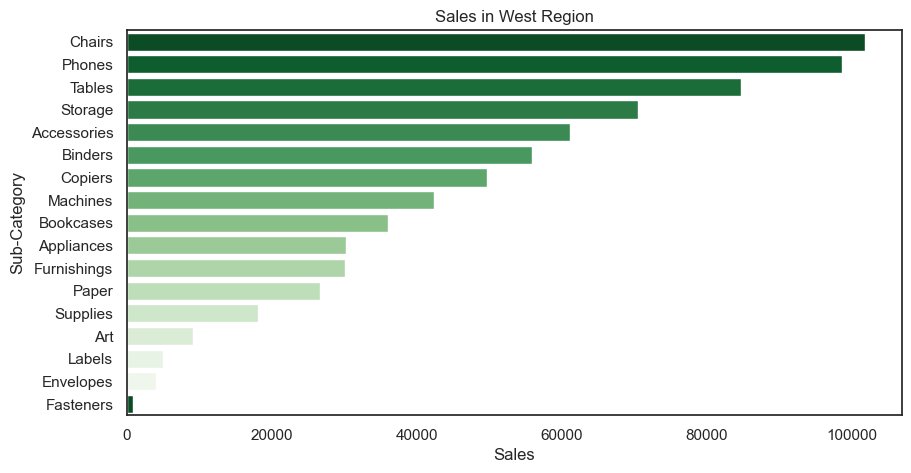

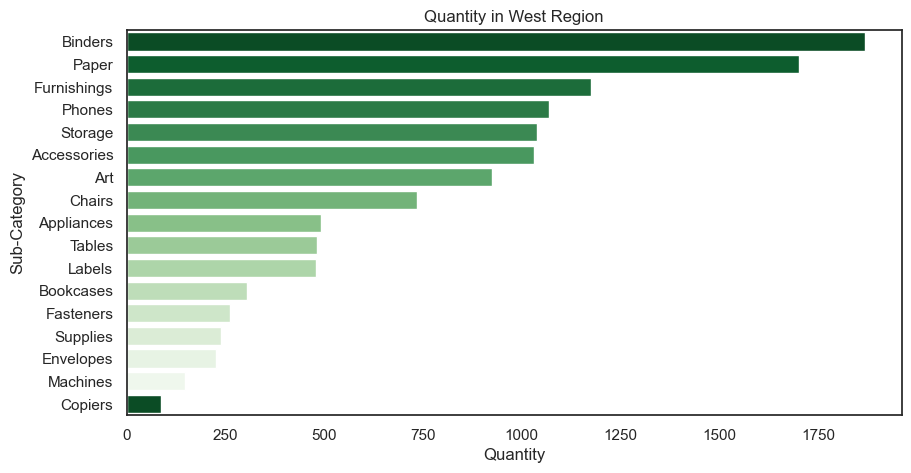

In [ ]:
region = "West"
palette = sns.color_palette("Greens_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


TThe following observations were made after findings on quantity, sales and profits of the West  Region based on sub category:

Copiers were the most profitable product in the region, followed by Accessories. On the other hand, Bookcases recorded a significant loss.

Chairs had the highest sales in the region, whereas Fasteners had the least sales. Phones had the second-highest number of products sold.

Binders were the product with the highest number of units sold, followed by Paper, while Copiers had the lowest number of units sold.

### Finding the quantity, sales and profits made in the North Asia region based on sub categories

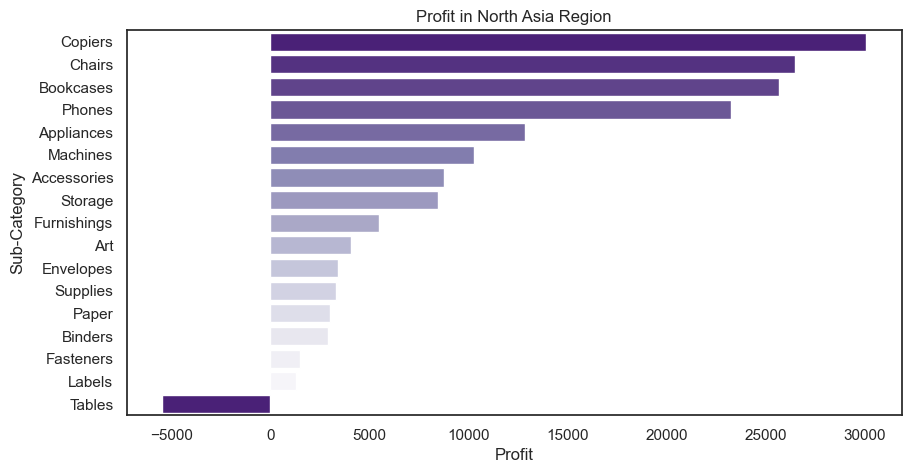

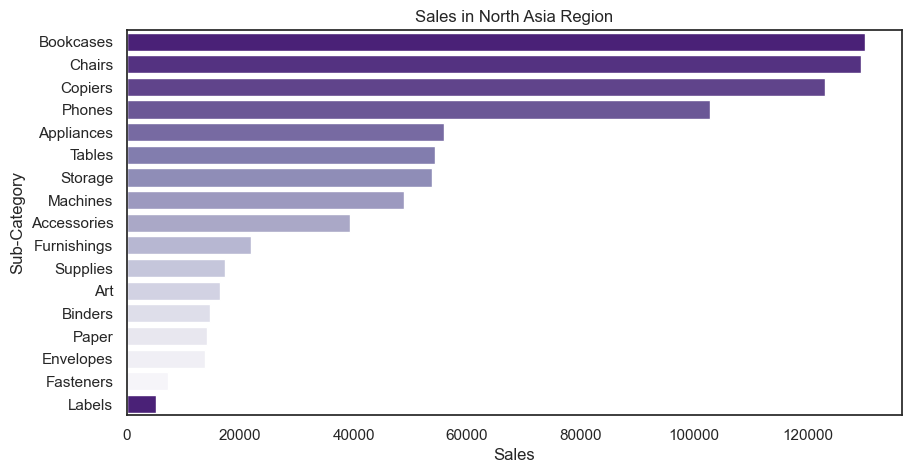

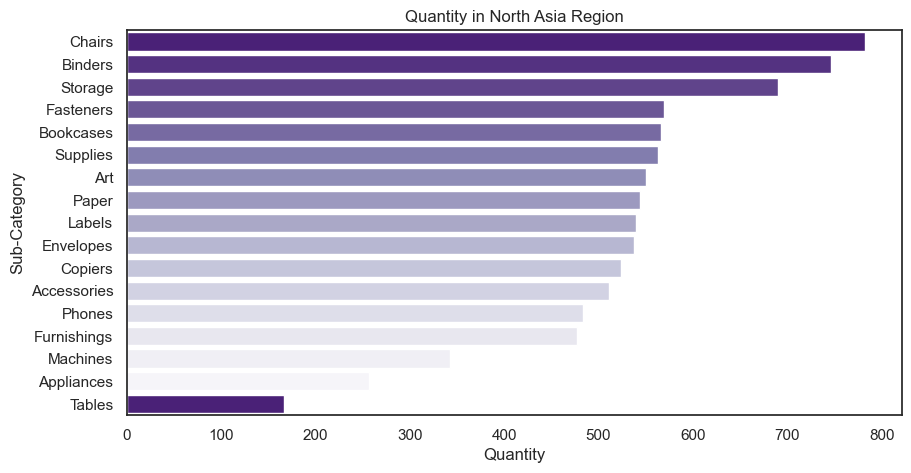

In [ ]:
region = "North Asia"
palette = sns.color_palette("Purples_r",16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the North Asia Region based on sub category:

Copiers were the most profitable product in the region, followed by Chairs. However, Tables recorded a loss.

Bookcases had the highest sales, with sales from Chairs coming in at a close second. On the other hand, Labels had very low sales in the region.

Binders were the product with the highest number of units sold, followed by Chairs, while Tables had the lowest number of units sold.

### Finding the quantity, sales and profits made in the Central Asia region based on sub categories

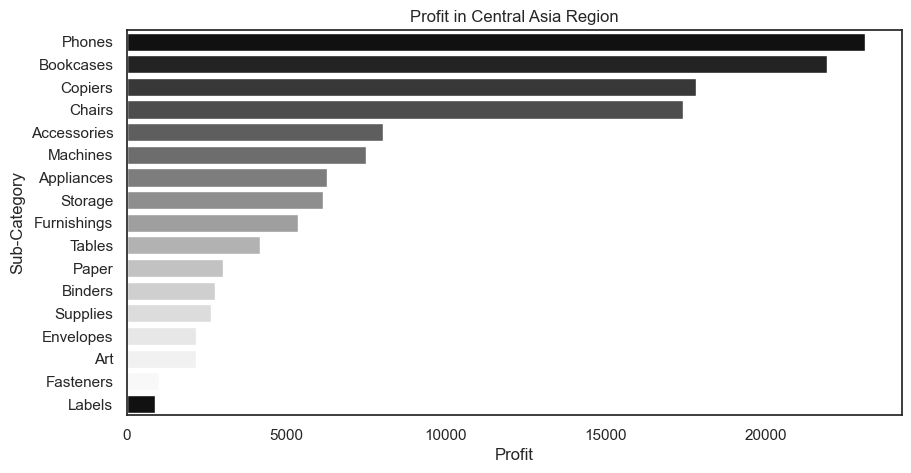

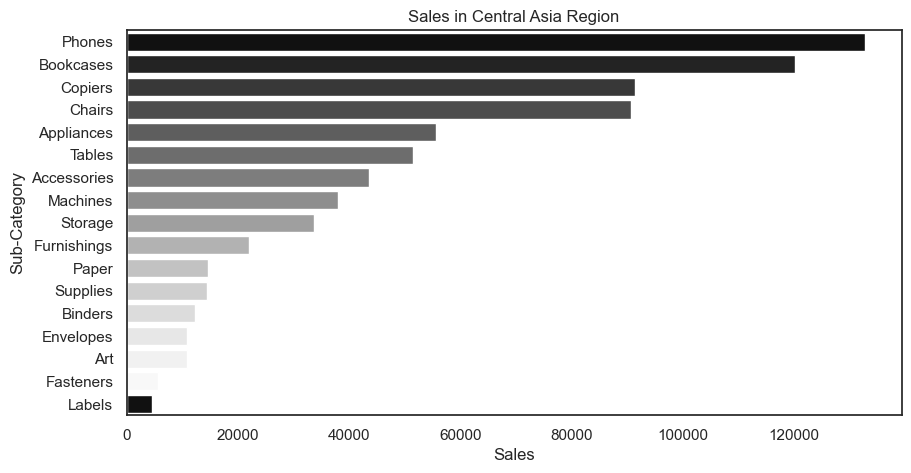

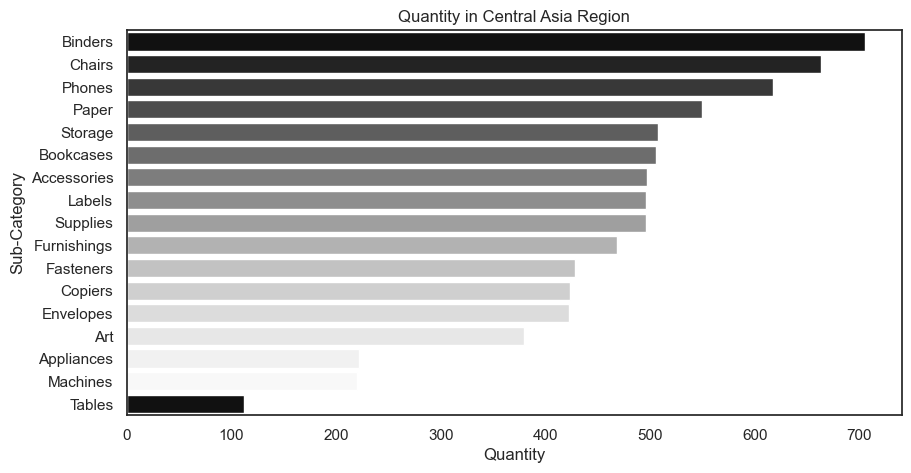

In [ ]:
region = "Central Asia"
palette = sns.color_palette("Greys_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the Central Asia Region based on the sub category:

The subcategory with the highest number of units sold in the Central Asia Region was Chairs, followed by Binders. Conversely, Tables had the lowest number of units sold.

The Phones subcategory had the highest sales among all the products, with Bookcases having slightly lower sales than Phones. On the other hand, Labels had the least sales in the region.

Phones, accompanied by Bookcases, was the most profitable subcategory in the region. Meanwhile, Labels had the lowest profit among all the products in the region..

### Finding the quantity, sales and profits made in the Southeast Asia region based on sub categories

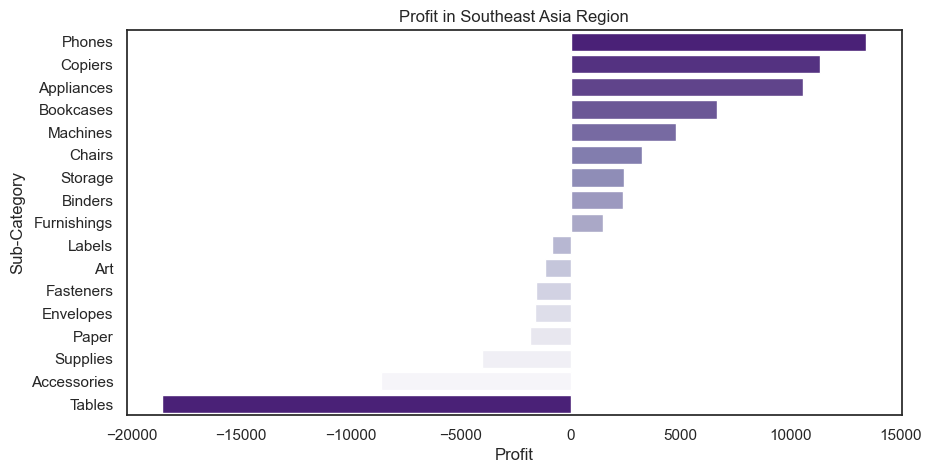

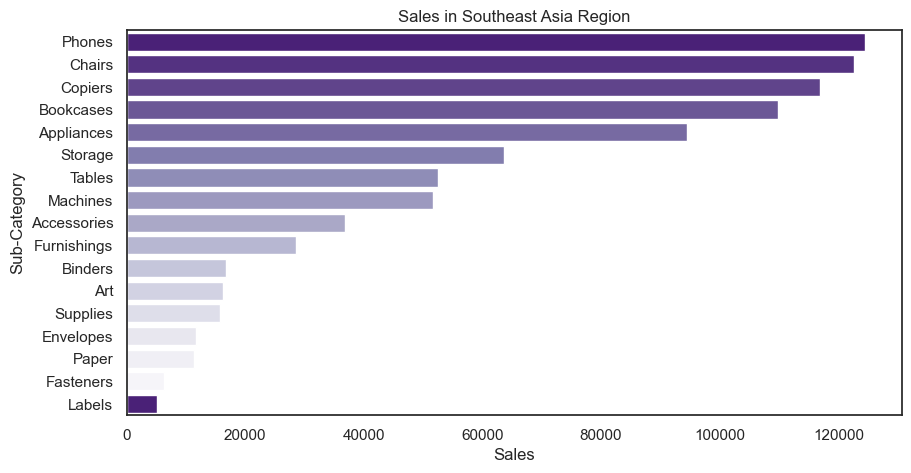

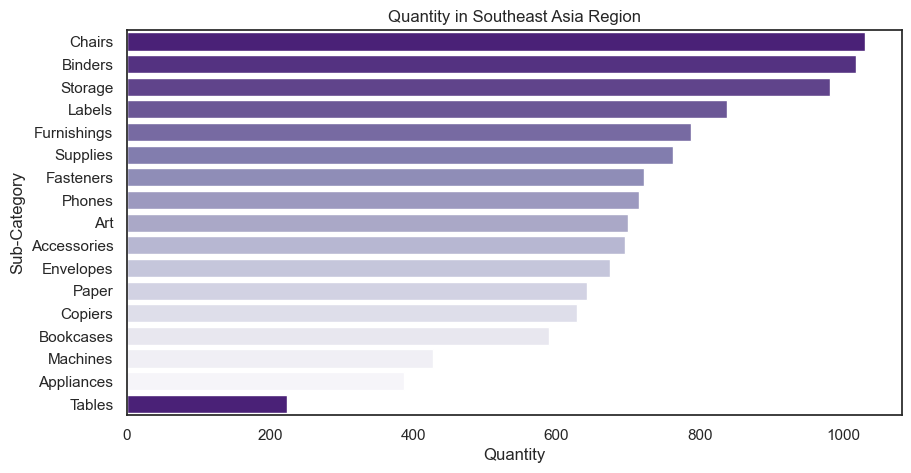

In [ ]:
region = "Southeast Asia"
palette = sns.color_palette("Purples_r", 16)

region_totals_profit = calculate_region_specific_totals(region, "Sub-Category", "Profit")
region_totals_sales = calculate_region_specific_totals(region, "Sub-Category", "Sales")
region_totals_quantity = calculate_region_specific_totals(region, "Sub-Category", "Quantity")

plot_totals_bar(region_totals_profit, "Sub-Category", "Profit", f"Profit in {region} Region", palette)
plot_totals_bar(region_totals_sales, "Sub-Category", "Sales", f"Sales in {region} Region", palette)
plot_totals_bar(region_totals_quantity, "Sub-Category", "Quantity", f"Quantity in {region} Region", palette)


The following observations were made after findings on quantity, sales and profits of the Southeast Asia Region based on sub category:

The Chair subcategory had the highest number of units sold in the South Asia Region, with Binders following closely behind. On the other hand, Tables had the lowest number of units sold.

In the Southeast Asia Region, the Phones subcategory had the highest sales, while Binders had slightly lower sales compared to Phones. Lables had the least sales in this region.

The most profitable sub category in the region was Phones, with Copiers coming in second. However, Copiers incurred a significant loss in the region.

## Statistical Inference

### Statistical test using the ANOVA test

ANOVA (Analysis of Variance) is a statistical technique used to compare the means of three or more groups. In our data, we are using ANOVA to test whether there are significant differences in sales, profit, and quantity among the top five regions. This test will help us determine whether there are any significant differences in their performance. By using ANOVA, we will obtain insights into the variations in sales, profit, and quantity across the regions, and make informed business decisions based on the results.

In [ ]:
def perform_region_anova(df, group_col, data_col, top_5_regions):
    data = df.loc[df[group_col].isin(top_5_regions), [group_col, data_col]]
    region_arrays = [data[data[group_col] == region][data_col] for region in top_5_regions]
    fvalue, pvalue = f_oneway(*region_arrays)
    a = print("F-value:", fvalue)
    b = print("p-value:", pvalue)
    return a, b

In [ ]:
#Running ANOVA test on the top 5 regions by Sales
top_5_regions = ['Central', 'North', 'South', 'Oceania', 'Southeast Asia']
fvalue, pvalue = perform_region_anova(df, "Region", "Sales", top_5_regions)

F-value: 15.339752059598538
p-value: 1.548654316342486e-12


In [ ]:
#Running ANOVA test on the top 5 regions by Quantity
top_5_regions = ['Central', 'North', 'South', 'Oceania', 'West']
fvalue, pvalue = perform_region_anova(df, "Region", "Quantity", top_5_regions)

F-value: 2.2223695794542286
p-value: 0.06394948368591073


In [ ]:
#Running ANOVA test on the top 5 regions by Profit
top_5_regions = ['Central', 'North', 'North Asia', 'South', 'Central Asia']
fvalue, pvalue = perform_region_anova(df, "Region", "Profit", top_5_regions)

F-value: 51.478840557379094
p-value: 2.9493211590742685e-43


The ANOVA test examined the Quantity, Sales and Profit differences among the various top five regions in our dataset.  

For Quantity, the test resulted in a borderline significant p-value of 0.06, indicating no strong evidence of differences in Quantity among regions. However, other factors such as sales revenue, customer satisfaction, or product popularity in the various regions could be explored.  

For Sales, the highly significant p-value of 1.55 indicates that there are significant differences in Sales among regions. This suggests that there may be other factors influencing sales performance in the different regions that could be investigated.  

For Profit, it showed a highly significant p-value of 2.95 indicating that there are significant differences in Profit among regions. Further investigation into the factors driving these differences may be necessary to better understand the performance of the different regions.

## Recommendations and Conclusion

These recommendations are based on the data provided, it is recommended that the company focuses on increasing the sales of the most profitable products in each region, namely Copiers, and Phones. Additionally, the company should take steps to reduce the losses incurred by products such as Tables, Furnishings, and Envelopes.

To boost sales, the company can explore marketing campaigns, promotional offers, and other incentives to attract customers. It may also be worthwhile to analyze customer feedback and make improvements to the product design or features.

Furthermore, the company should consider optimizing its inventory management by adjusting the stock levels of products based on their sales performance. This can help ensure that they have enough stock of the high-demand products while minimizing inventory costs and reducing waste.

In terms of unit sales, Binders and Storage appear to be the most popular products. The company can explore offering bundled deals or discounts on these products to further increase sales.

Overall, by focusing on the most profitable products, addressing low-performing products, and optimizing inventory management, the company can increase revenue and improve profitability in each region.

### Saving to a csv

In [ ]:
data.to_csv("superstore_cleaned.csv")

![Thank%20you.jpg](attachment:Thank%20you.jpg)